In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
num_classes = 10
batch_size = 100
epochs = 10
baseline = 1. / num_classes
alpha = 0.1
stats = []

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001))

In [8]:
for n in range(epochs):
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:(i + batch_size)]
        y_batch = y_train[i:(i + batch_size)]

        # predict class probabilities
        y_pred = model.predict(x_batch)

        # sample from those probabilities
        y_sample = np.empty((batch_size,), dtype=np.integer)
        for j, p in enumerate(y_pred):
            y_sample[j] = np.random.choice(num_classes, p=p)

        # calculate accuracy for logging
        y_pred = np.argmax(y_pred, axis=1)
        accuracy = np.mean(y_pred == y_batch)

        # calculate reward and advantage, update baseline
        reward = (y_sample == y_batch)
        advantage = reward - baseline
        baseline = alpha * np.mean(reward) + (1 - alpha) * baseline

        # train with samples as targets and advantage as sample weight
        loss = model.train_on_batch(x_batch, y_sample, sample_weight = advantage)

        # log statistics
        stats.append((loss, accuracy, baseline))
        print(i, loss, accuracy, baseline)

(0, 0.074599229, 0.059999999999999998, 0.10300000000000001)
(100, -0.097457811, 0.23000000000000001, 0.09870000000000001)
(200, 0.012370352, 0.17000000000000001, 0.099830000000000002)
(300, -0.046364006, 0.070000000000000007, 0.097847000000000017)
(400, 0.065848075, 0.10000000000000001, 0.10106230000000002)
(500, -0.0026092124, 0.20000000000000001, 0.10195607000000002)
(600, 0.068068512, 0.20000000000000001, 0.10576046300000003)
(700, -0.019751566, 0.12, 0.10618441670000002)
(800, 0.044828635, 0.19, 0.11056597503000001)
(900, 0.14487977, 0.16, 0.12050937752700001)
(1000, -0.0051198793, 0.25, 0.12445843977430002)
(1100, -0.065683529, 0.34999999999999998, 0.12801259579687002)
(1200, 0.057433855, 0.31, 0.13621133621718301)
(1300, -0.068184346, 0.39000000000000001, 0.14359020259546471)
(1400, 0.014795308, 0.40999999999999998, 0.15423118233591823)
(1500, -0.022535862, 0.5, 0.1678080641023264)
(1600, -0.028084498, 0.56999999999999995, 0.19002725769209378)
(1700, -0.0147007, 0.579999999999999

(14300, -1.1431032, 0.68000000000000005, 0.6523372407254644)
(14400, -1.2377832, 0.68000000000000005, 0.65410351665291788)
(14500, -1.0125396, 0.68999999999999995, 0.65769316498762609)
(14600, -1.6746601, 0.58999999999999997, 0.65092384848886353)
(14700, -1.770952, 0.65000000000000002, 0.65183146363997713)
(14800, -0.93312621, 0.75, 0.66064831727597939)
(14900, -0.12249599, 0.79000000000000004, 0.67258348554838143)
(15000, -0.76996666, 0.78000000000000003, 0.68132513699354336)
(15100, -0.736579, 0.79000000000000004, 0.68919262329418896)
(15200, -1.4733766, 0.75, 0.69427336096476999)
(15300, -0.18269669, 0.73999999999999999, 0.69884602486829295)
(15400, -1.5193248, 0.71999999999999997, 0.70196142238146364)
(15500, -0.94451624, 0.78000000000000003, 0.7087652801433173)
(15600, -0.18937375, 0.77000000000000002, 0.71788875212898562)
(15700, -0.89433175, 0.70999999999999996, 0.71809987691608701)
(15800, -1.280916, 0.71999999999999997, 0.71828988922447823)
(15900, -0.58817887, 0.7700000000000

(27900, -0.99699521, 0.81000000000000005, 0.77964747696513825)
(28000, -0.79280496, 0.89000000000000001, 0.79068272926862437)
(28100, -0.65692002, 0.84999999999999998, 0.79661445634176187)
(28200, -1.1077032, 0.84999999999999998, 0.80195301070758562)
(28300, -1.1277694, 0.80000000000000004, 0.80175770963682713)
(28400, -1.4246289, 0.81000000000000005, 0.80258193867314453)
(28500, -0.24164616, 0.87, 0.80832374480583002)
(28600, -0.34770587, 0.77000000000000002, 0.80449137032524698)
(28700, -1.3483869, 0.81000000000000005, 0.80604223329272229)
(28800, -1.3376982, 0.81999999999999995, 0.80843800996345005)
(28900, -0.92922449, 0.78000000000000003, 0.80659420896710499)
(29000, -1.5082477, 0.80000000000000004, 0.80593478807039443)
(29100, -1.3650885, 0.77000000000000002, 0.80234130926335512)
(29200, -0.78212214, 0.84999999999999998, 0.80610717833701961)
(29300, -0.6989432, 0.81999999999999995, 0.80749646050331758)
(29400, -0.32140756, 0.89000000000000001, 0.8147468144529858)
(29500, -0.69791

(41700, -0.34882671, 0.89000000000000001, 0.82742561764382527)
(41800, -1.3945029, 0.82999999999999996, 0.82668305587944269)
(41900, -1.1563951, 0.80000000000000004, 0.82401475029149851)
(42000, -1.0300232, 0.80000000000000004, 0.82261327526234873)
(42100, -1.2830282, 0.78000000000000003, 0.81835194773611386)
(42200, -1.7756491, 0.73999999999999999, 0.81051675296250247)
(42300, -0.94648832, 0.75, 0.8044650776662523)
(42400, -0.57177943, 0.77000000000000002, 0.80101856989962705)
(42500, -0.23960486, 0.81999999999999995, 0.80291671290966438)
(42600, -1.2911649, 0.77000000000000002, 0.79862504161869796)
(42700, -0.94184721, 0.77000000000000002, 0.79576253745682823)
(42800, -1.3884774, 0.76000000000000001, 0.79118628371114541)
(42900, -1.6718615, 0.71999999999999997, 0.78306765534003087)
(43000, -1.0804542, 0.75, 0.78176088980602776)
(43100, -0.428844, 0.83999999999999997, 0.78658480082542492)
(43200, -1.3749908, 0.77000000000000002, 0.78492632074288249)
(43300, -0.88347924, 0.859999999999

(55500, -0.681669, 0.87, 0.84495668277605673)
(55600, -1.4691216, 0.80000000000000004, 0.84046101449845101)
(55700, -0.40782741, 0.84999999999999998, 0.84241491304860594)
(55800, -0.42437038, 0.88, 0.84617342174374532)
(55900, -1.019369, 0.88, 0.84855607956937074)
(56000, -0.8876211, 0.81999999999999995, 0.84570047161243367)
(56100, -0.7028963, 0.87, 0.84913042445119025)
(56200, -0.59297431, 0.81999999999999995, 0.84721738200607122)
(56300, -0.5772782, 0.88, 0.85049564380546405)
(56400, -0.74353623, 0.82999999999999996, 0.84844607942491768)
(56500, -0.90678769, 0.85999999999999999, 0.85160147148242593)
(56600, -1.0821121, 0.82999999999999996, 0.84944132433418329)
(56700, -0.34920055, 0.91000000000000003, 0.8544971919007649)
(56800, -1.2637398, 0.82999999999999996, 0.85304747271068837)
(56900, -0.91848534, 0.88, 0.85574272543961949)
(57000, -2.2970085, 0.76000000000000001, 0.84616845289565767)
(57100, -0.48662141, 0.88, 0.84955160760609194)
(57200, -0.77767253, 0.81999999999999995, 0.84

(9900, -1.5100152, 0.84999999999999998, 0.85455870471579432)
(10000, -0.65488702, 0.87, 0.85610283424421485)
(10100, -0.91151381, 0.87, 0.85749255081979336)
(10200, -0.99318886, 0.81000000000000005, 0.85174329573781415)
(10300, -0.59116971, 0.90000000000000002, 0.85656896616403277)
(10400, -0.91120833, 0.85999999999999999, 0.85691206954762944)
(10500, -0.96201044, 0.87, 0.85822086259286645)
(10600, -0.47127202, 0.88, 0.86039877633357975)
(10700, -1.18652, 0.85999999999999999, 0.86035889870022175)
(10800, -1.1848311, 0.84999999999999998, 0.85932300883019952)
(10900, -0.36818397, 0.88, 0.86139070794717953)
(11000, -0.79978943, 0.88, 0.86325163715246156)
(11100, -1.294475, 0.81999999999999995, 0.8589264734372154)
(11200, -0.74434221, 0.84999999999999998, 0.85803382609349388)
(11300, -0.96437651, 0.83999999999999997, 0.85623044348414445)
(11400, -1.2227806, 0.85999999999999999, 0.85660739913573003)
(11500, -0.86099017, 0.81999999999999995, 0.85294665922215696)
(11600, -0.89381981, 0.819999

(23900, -1.00181, 0.84999999999999998, 0.85602583624402773)
(24000, -1.7856684, 0.82999999999999996, 0.85342325261962493)
(24100, -1.3284191, 0.80000000000000004, 0.84808092735766238)
(24200, -0.82610071, 0.85999999999999999, 0.85027283462189618)
(24300, -0.79573596, 0.89000000000000001, 0.85424555115970657)
(24400, -0.68358088, 0.85999999999999999, 0.85482099604373585)
(24500, -0.95127672, 0.84999999999999998, 0.85433889643936223)
(24600, -1.4849463, 0.78000000000000003, 0.84690500679542602)
(24700, -1.3690774, 0.81999999999999995, 0.84421450611588345)
(24800, -0.81311202, 0.85999999999999999, 0.84579305550429507)
(24900, -1.1341565, 0.82999999999999996, 0.84421374995386556)
(25000, -1.2759308, 0.84999999999999998, 0.84479237495847903)
(25100, -0.95706087, 0.85999999999999999, 0.84531313746263115)
(25200, -1.2682676, 0.83999999999999997, 0.84378182371636801)
(25300, -1.3260514, 0.82999999999999996, 0.84340364134473123)
(25400, -1.2295282, 0.83999999999999997, 0.84306327721025809)
(255

(38000, -0.68691099, 0.88, 0.84795691796028938)
(38100, -0.75441384, 0.88, 0.85116122616426038)
(38200, -0.3719503, 0.91000000000000003, 0.85704510354783436)
(38300, -1.0994339, 0.81000000000000005, 0.85334059319305089)
(38400, -1.3352661, 0.87, 0.85500653387374581)
(38500, -0.80270845, 0.84999999999999998, 0.85450588048637122)
(38600, -0.45598653, 0.89000000000000001, 0.85805529243773404)
(38700, -0.77833182, 0.82999999999999996, 0.85524976319396062)
(38800, -1.171277, 0.85999999999999999, 0.85572478687456455)
(38900, -1.2167222, 0.85999999999999999, 0.85615230818710808)
(39000, -1.3348908, 0.87, 0.85753707736839724)
(39100, -1.49483, 0.81000000000000005, 0.85378336963155754)
(39200, -0.93958306, 0.88, 0.85440503266840173)
(39300, -1.4966868, 0.78000000000000003, 0.84596452940156164)
(39400, -0.41442358, 0.88, 0.84936807646140544)
(39500, -0.66883409, 0.90000000000000002, 0.85443126881526488)
(39600, -1.0641761, 0.84999999999999998, 0.8539881419337384)
(39700, -0.74090117, 0.890000000

(52000, -0.56509447, 0.84999999999999998, 0.85394026360074649)
(52100, -0.51147467, 0.88, 0.8565462372406718)
(52200, -0.92980993, 0.82999999999999996, 0.85489161351660459)
(52300, -1.0422341, 0.89000000000000001, 0.85840245216494415)
(52400, -0.97461927, 0.83999999999999997, 0.85656220694844976)
(52500, -0.93670154, 0.91000000000000003, 0.86190598625360482)
(52600, -0.95818901, 0.88, 0.86371538762824429)
(52700, -1.2375044, 0.87, 0.86434384886541982)
(52800, -0.94118929, 0.83999999999999997, 0.8619094639788778)
(52900, -1.9588372, 0.77000000000000002, 0.85271851758099015)
(53000, -2.1332955, 0.79000000000000004, 0.84544666582289119)
(53100, -1.3522846, 0.81000000000000005, 0.84190199924060205)
(53200, -1.5370815, 0.85999999999999999, 0.84371179931654183)
(53300, -0.2467986, 0.93999999999999995, 0.85334061938488759)
(53400, -0.81880516, 0.88, 0.85600655744639886)
(53500, -1.1011939, 0.83999999999999997, 0.85440590170175901)
(53600, -1.0203763, 0.81999999999999995, 0.85096531153158306)


(6300, -1.0199219, 0.90000000000000002, 0.87719199263027969)
(6400, -1.066222, 0.85999999999999999, 0.8754727933672517)
(6500, -1.6330249, 0.85999999999999999, 0.87392551403052654)
(6600, -0.99694473, 0.87, 0.87353296262747382)
(6700, -1.0994325, 0.85999999999999999, 0.87217966636472644)
(6800, -1.4836187, 0.81999999999999995, 0.86696169972825377)
(6900, -0.93900138, 0.84999999999999998, 0.86626552975542837)
(7000, -0.95349371, 0.83999999999999997, 0.86363897677988555)
(7100, -1.6593888, 0.82999999999999996, 0.86027507910189693)
(7200, -0.54325831, 0.90000000000000002, 0.86324757119170725)
(7300, -0.95035905, 0.84999999999999998, 0.86192281407253646)
(7400, -1.1227622, 0.87, 0.86173053266528277)
(7500, -1.2510687, 0.85999999999999999, 0.86155747939875449)
(7600, -1.2914131, 0.85999999999999999, 0.86140173145887899)
(7700, -1.2366439, 0.83999999999999997, 0.85926155831299111)
(7800, -1.2056332, 0.83999999999999997, 0.85733540248169193)
(7900, -0.71413249, 0.87, 0.85960186223352275)
(800

(20500, -1.4310617, 0.84999999999999998, 0.87799719141043742)
(20600, -1.6955101, 0.82999999999999996, 0.8731974722693937)
(20700, -0.79553521, 0.83999999999999997, 0.86987772504245431)
(20800, -0.95976061, 0.85999999999999999, 0.86888995253820889)
(20900, -1.1176269, 0.80000000000000004, 0.86200095728438808)
(21000, -0.46964028, 0.92000000000000004, 0.86780086155594927)
(21100, -1.4765441, 0.81999999999999995, 0.86302077540035427)
(21200, -0.67396879, 0.91000000000000003, 0.86771869786031885)
(21300, -0.70948327, 0.89000000000000001, 0.86994682807428692)
(21400, -1.1477519, 0.89000000000000001, 0.87195214526685816)
(21500, -0.27184999, 0.88, 0.87275693074017235)
(21600, -0.72165251, 0.89000000000000001, 0.87448123766615515)
(21700, -0.84972644, 0.90000000000000002, 0.87703311389953964)
(21800, -0.78273153, 0.92000000000000004, 0.8813298025095857)
(21900, -0.27883136, 0.89000000000000001, 0.88219682225862717)
(22000, -0.77501029, 0.93000000000000005, 0.8869771400327644)
(22100, -1.6024

(34700, -1.7644861, 0.81000000000000005, 0.86230097668179706)
(34800, -1.2373693, 0.82999999999999996, 0.85907087901361734)
(34900, -1.3429251, 0.81999999999999995, 0.8551637911122556)
(35000, -1.3847426, 0.82999999999999996, 0.85264741200103)
(35100, -0.59829313, 0.90000000000000002, 0.857382670800927)
(35200, -0.88275492, 0.88, 0.85964440372083428)
(35300, -1.2383747, 0.84999999999999998, 0.85867996334875085)
(35400, -1.0775847, 0.87, 0.85881196701387574)
(35500, -1.0322298, 0.88, 0.8609307703124881)
(35600, -0.78723902, 0.84999999999999998, 0.85983769328123927)
(35700, -1.0899024, 0.85999999999999999, 0.85985392395311533)
(35800, -0.21627764, 0.91000000000000003, 0.86486853155780374)
(35900, -1.1484691, 0.83999999999999997, 0.8623816784020234)
(36000, -1.1126554, 0.83999999999999997, 0.86014351056182103)
(36100, -0.83563161, 0.88, 0.86212915950563895)
(36200, -0.8483479, 0.85999999999999999, 0.86191624355507501)
(36300, -0.44016498, 0.89000000000000001, 0.86572461919956745)
(36400, 

(48700, -1.069626, 0.84999999999999998, 0.85465024282319924)
(48800, -0.64562559, 0.93000000000000005, 0.86218521854087926)
(48900, -0.64717865, 0.89000000000000001, 0.86496669668679127)
(49000, -1.7051884, 0.79000000000000004, 0.85747002701811215)
(49100, -0.88349044, 0.87, 0.85872302431630088)
(49200, -1.5730649, 0.82999999999999996, 0.85585072188467082)
(49300, -0.47085083, 0.93999999999999995, 0.86426564969620367)
(49400, -1.4728901, 0.81999999999999995, 0.85983908472658332)
(49500, -1.5238173, 0.80000000000000004, 0.85385517625392504)
(49600, -1.2066294, 0.84999999999999998, 0.85346965862853252)
(49700, -0.53704393, 0.91000000000000003, 0.85912269276567921)
(49800, -1.115244, 0.81999999999999995, 0.85521042348911125)
(49900, -1.4384521, 0.81999999999999995, 0.8516893811402001)
(50000, -1.0208354, 0.87, 0.85352044302618002)
(50100, -1.6605417, 0.82999999999999996, 0.85116839872356198)
(50200, -1.1863469, 0.84999999999999998, 0.85105155885120576)
(50300, -0.51067847, 0.8199999999999

(2500, -0.6267972, 0.90000000000000002, 0.87760781091374052)
(2600, -1.1821966, 0.82999999999999996, 0.87184702982236639)
(2700, -0.16041265, 0.93000000000000005, 0.87766232684012979)
(2800, -0.66183329, 0.91000000000000003, 0.8808960941561168)
(2900, -1.0453975, 0.89000000000000001, 0.88180648474050516)
(3000, -1.498111, 0.81000000000000005, 0.87462583626645474)
(3100, -1.2777134, 0.84999999999999998, 0.87216325263980921)
(3200, -0.90363204, 0.88, 0.87294692737582824)
(3300, -0.27251476, 0.93000000000000005, 0.87865223463824538)
(3400, -1.46266, 0.82999999999999996, 0.87378701117442081)
(3500, -0.87448883, 0.85999999999999999, 0.87240831005697872)
(3600, -1.5792576, 0.81999999999999995, 0.86716747905128078)
(3700, -1.8032084, 0.82999999999999996, 0.86245073114615267)
(3800, -1.2399582, 0.87, 0.86320565803153737)
(3900, -1.2562761, 0.87, 0.86388509222838361)
(4000, -0.88260591, 0.85999999999999999, 0.86349658300554522)
(4100, -1.0922027, 0.87, 0.86414692470499066)
(4200, -0.72242576, 0

(16900, -0.93977797, 0.84999999999999998, 0.85740284157158131)
(17000, -1.6849942, 0.82999999999999996, 0.85466255741442321)
(17100, -1.6584496, 0.83999999999999997, 0.85219630167298088)
(17200, -0.34489873, 0.88, 0.85497667150568279)
(17300, -0.91469461, 0.91000000000000003, 0.86047900435511449)
(17400, -0.32354555, 0.91000000000000003, 0.86543110391960298)
(17500, -1.1868253, 0.81000000000000005, 0.85988799352764267)
(17600, -1.8765271, 0.81000000000000005, 0.85389919417487836)
(17700, -1.2814566, 0.83999999999999997, 0.85250927475739047)
(17800, -0.68858457, 0.87, 0.8542583472816514)
(17900, -1.2209682, 0.84999999999999998, 0.85383251255348624)
(18000, -0.72065574, 0.89000000000000001, 0.85744926129813759)
(18100, -0.75929391, 0.90000000000000002, 0.86170433516832379)
(18200, -1.2677861, 0.84999999999999998, 0.86053390165149135)
(18300, -1.4165649, 0.81000000000000005, 0.85548051148634219)
(18400, -1.2882338, 0.83999999999999997, 0.85393246033770798)
(18500, -1.1394229, 0.87, 0.8555

(31300, -1.0439624, 0.80000000000000004, 0.84824270224624621)
(31400, -1.2513231, 0.85999999999999999, 0.84941843202162159)
(31500, -0.17367023, 0.91000000000000003, 0.85547658881945943)
(31600, -0.75868917, 0.85999999999999999, 0.85592892993751346)
(31700, -1.474043, 0.81000000000000005, 0.85133603694376214)
(31800, -1.0083761, 0.84999999999999998, 0.85120243324938594)
(31900, -0.9739511, 0.91000000000000003, 0.85708218992444729)
(32000, -1.4224236, 0.83999999999999997, 0.85437397093200251)
(32100, -1.2997202, 0.84999999999999998, 0.85393657383880228)
(32200, -0.53876239, 0.84999999999999998, 0.85354291645492208)
(32300, -0.72917253, 0.85999999999999999, 0.85418862480942981)
(32400, -1.3834232, 0.79000000000000004, 0.84776976232848678)
(32500, -1.0263388, 0.90000000000000002, 0.85299278609563811)
(32600, -0.46490875, 0.88, 0.85569350748607431)
(32700, -1.3358934, 0.83999999999999997, 0.85412415673746689)
(32800, -0.91861665, 0.89000000000000001, 0.85771174106372017)
(32900, -0.9086076

(45700, -1.2722852, 0.85999999999999999, 0.85704640640081819)
(45800, -2.3153493, 0.79000000000000004, 0.8513417657607365)
(45900, -1.0823492, 0.83999999999999997, 0.84920758918466288)
(46000, -0.63180339, 0.90000000000000002, 0.85428683026619656)
(46100, -0.6198585, 0.89000000000000001, 0.85785814723957687)
(46200, -1.9008012, 0.79000000000000004, 0.8520723325156192)
(46300, -1.6869671, 0.80000000000000004, 0.8468650992640574)
(46400, -0.61898875, 0.84999999999999998, 0.84717858933765167)
(46500, -0.69612777, 0.91000000000000003, 0.85346073040388648)
(46600, -1.1092255, 0.89000000000000001, 0.85711465736349779)
(46700, -1.7608033, 0.80000000000000004, 0.85140319162714806)
(46800, -1.0727838, 0.89000000000000001, 0.85526287246443322)
(46900, -0.83880579, 0.90000000000000002, 0.8597365852179899)
(47000, -1.6672221, 0.81000000000000005, 0.85476292669619092)
(47100, -0.9080658, 0.87, 0.85628663402657179)
(47200, -1.677565, 0.81999999999999995, 0.85365797062391457)
(47300, -1.1166087, 0.84

(100, -1.218843, 0.87, 0.87774599227793038)
(200, -0.53968436, 0.89000000000000001, 0.87897139305013727)
(300, -1.4608704, 0.88, 0.87907425374512349)
(400, -0.57163197, 0.90000000000000002, 0.88116682837061111)
(500, -0.74299711, 0.87, 0.88005014553354999)
(600, -0.22533607, 0.92000000000000004, 0.88404513098019499)
(700, -2.2598791, 0.80000000000000004, 0.87564061788217562)
(800, -1.1854639, 0.87, 0.87507655609395807)
(900, -0.88289362, 0.90000000000000002, 0.87756890048456226)
(1000, -1.193234, 0.81999999999999995, 0.87181201043610601)
(1100, -0.39021447, 0.93000000000000005, 0.87763080939249538)
(1200, -1.7551345, 0.80000000000000004, 0.86986772845324589)
(1300, -1.1180866, 0.85999999999999999, 0.86888095560792133)
(1400, -0.72968221, 0.90000000000000002, 0.87199286004712917)
(1500, -1.1147152, 0.89000000000000001, 0.8737935740424162)
(1600, -0.36783195, 0.93000000000000005, 0.87941421663817454)
(1700, -1.5363295, 0.84999999999999998, 0.87647279497435704)
(1800, -0.4515692, 0.949999

(14400, -1.3922157, 0.87, 0.86618254701363595)
(14500, -0.079153202, 0.95999999999999996, 0.8755642923122724)
(14600, -1.021942, 0.82999999999999996, 0.87100786308104516)
(14700, -1.2985729, 0.81000000000000005, 0.86490707677294076)
(14800, -0.92976028, 0.84999999999999998, 0.86341636909564667)
(14900, -0.63406497, 0.89000000000000001, 0.866074732186082)
(15000, -0.40553612, 0.92000000000000004, 0.87146725896747379)
(15100, -0.86188704, 0.87, 0.87132053307072643)
(15200, -0.89224154, 0.85999999999999999, 0.87018847976365377)
(15300, -1.1774038, 0.88, 0.87116963178728835)
(15400, -1.3310962, 0.84999999999999998, 0.86905266860855945)
(15500, -0.92002565, 0.87, 0.86914740174770344)
(15600, -1.1105725, 0.87, 0.86923266157293311)
(15700, -1.550647, 0.85999999999999999, 0.86830939541563978)
(15800, -0.74662757, 0.89000000000000001, 0.8704784558740758)
(15900, -1.3856552, 0.84999999999999998, 0.86843061028666824)
(16000, -1.5180719, 0.82999999999999996, 0.86458754925800141)
(16100, -1.3411511

(28800, -0.80304819, 0.91000000000000003, 0.8683304742084742)
(28900, -1.4372636, 0.83999999999999997, 0.86549742678762676)
(29000, -0.62597442, 0.89000000000000001, 0.86794768410886403)
(29100, -2.3565757, 0.77000000000000002, 0.86015291569797769)
(29200, -1.097139, 0.87, 0.86113762412817996)
(29300, -1.0205216, 0.83999999999999997, 0.86002386171536194)
(29400, -0.47489402, 0.92000000000000004, 0.86602147554382569)
(29500, -0.67986166, 0.90000000000000002, 0.8694193279894431)
(29600, -1.5279042, 0.85999999999999999, 0.86847739519049882)
(29700, -1.305704, 0.85999999999999999, 0.8676296556714489)
(29800, -0.39767733, 0.93000000000000005, 0.87386669010430396)
(29900, -1.0941215, 0.85999999999999999, 0.87248002109387357)
(30000, -0.87189776, 0.88, 0.87323201898448621)
(30100, -0.88794827, 0.90000000000000002, 0.87590881708603763)
(30200, -1.3429959, 0.88, 0.87631793537743385)
(30300, -1.126124, 0.88, 0.8766861418396904)
(30400, -0.92824954, 0.85999999999999999, 0.87501752765572138)
(3050

(43000, -0.9411571, 0.83999999999999997, 0.86518553920121111)
(43100, -0.61211258, 0.90000000000000002, 0.86866698528108999)
(43200, -1.3209779, 0.85999999999999999, 0.86780028675298093)
(43300, -1.467263, 0.88, 0.86902025807768279)
(43400, -0.71184814, 0.90000000000000002, 0.87111823226991447)
(43500, -1.5095956, 0.81000000000000005, 0.86500640904292303)
(43600, -1.1413934, 0.88, 0.86650576813863067)
(43700, -0.95120043, 0.89000000000000001, 0.86885519132476763)
(43800, -1.1442333, 0.88, 0.86996967219229082)
(43900, -2.0390236, 0.84999999999999998, 0.86697270497306167)
(44000, -0.91201049, 0.87, 0.8672754344757555)
(44100, -1.2947289, 0.85999999999999999, 0.86654789102817997)
(44200, -1.6470319, 0.82999999999999996, 0.86289310192536195)
(44300, -1.0864154, 0.90000000000000002, 0.86660379173282576)
(44400, -0.83657426, 0.89000000000000001, 0.86894341255954322)
(44500, -1.01464, 0.90000000000000002, 0.87204907130358889)
(44600, -1.8646916, 0.83999999999999997, 0.86884416417322996)
(4470

(57200, -1.3501717, 0.85999999999999999, 0.86940584003111465)
(57300, -1.4221588, 0.87, 0.86946525602800318)
(57400, -1.4152474, 0.88, 0.87051873042520289)
(57500, -1.4462152, 0.85999999999999999, 0.86946685738268259)
(57600, -1.399498, 0.81000000000000005, 0.8635201716444143)
(57700, -0.91235465, 0.83999999999999997, 0.86116815447997286)
(57800, -0.77510101, 0.93000000000000005, 0.86705133903197551)
(57900, -0.78121829, 0.93000000000000005, 0.87334620512877792)
(58000, -0.7320742, 0.89000000000000001, 0.87501158461590012)
(58100, -1.7316926, 0.85999999999999999, 0.87351042615431007)
(58200, -0.80340147, 0.90000000000000002, 0.87615938353887901)
(58300, -0.99455106, 0.89000000000000001, 0.87754344518499106)
(58400, -1.1545422, 0.90000000000000002, 0.87978910066649196)
(58500, -0.76975733, 0.92000000000000004, 0.88381019059984278)
(58600, -1.0398355, 0.89000000000000001, 0.88442917153985845)
(58700, -1.1147128, 0.89000000000000001, 0.88498625438587264)
(58800, -1.6767637, 0.849999999999

(12100, -1.2103728, 0.85999999999999999, 0.87294024388836478)
(12200, -1.3047169, 0.85999999999999999, 0.87164621949952825)
(12300, -0.99666452, 0.91000000000000003, 0.87548159754957544)
(12400, -0.8531279, 0.89000000000000001, 0.87693343779461785)
(12500, -0.77001834, 0.91000000000000003, 0.88024009401515602)
(12600, -1.1328728, 0.83999999999999997, 0.87621608461364042)
(12700, -0.5564478, 0.93000000000000005, 0.88159447615227637)
(12800, -0.7718187, 0.89000000000000001, 0.88243502853704869)
(12900, -1.3335168, 0.85999999999999999, 0.8801915256833438)
(13000, -1.0705527, 0.81000000000000005, 0.87317237311500939)
(13100, -1.0293288, 0.83999999999999997, 0.86885513580350848)
(13200, -0.17648512, 0.93999999999999995, 0.87596962222315766)
(13300, -1.7839618, 0.84999999999999998, 0.8733726600008419)
(13400, -1.60131, 0.81999999999999995, 0.86803539400075769)
(13500, -1.0111996, 0.91000000000000003, 0.87223185460068187)
(13600, -1.3027469, 0.88, 0.8730086691406137)
(13700, -0.85909593, 0.89

(26300, -0.57021642, 0.90000000000000002, 0.88048284100299123)
(26400, -1.0665518, 0.90000000000000002, 0.88243455690269212)
(26500, -1.0413489, 0.87, 0.88119110121242294)
(26600, -1.1946262, 0.83999999999999997, 0.87707199109118061)
(26700, -1.5231445, 0.81999999999999995, 0.87136479198206251)
(26800, -1.0547554, 0.89000000000000001, 0.87322831278385626)
(26900, -0.97750592, 0.89000000000000001, 0.87490548150547065)
(27000, -1.4017193, 0.85999999999999999, 0.87341493335492359)
(27100, -1.2732401, 0.84999999999999998, 0.87107344001943121)
(27200, -1.4105957, 0.85999999999999999, 0.86996609601748809)
(27300, -1.0384679, 0.89000000000000001, 0.87196948641573924)
(27400, -0.70909423, 0.92000000000000004, 0.87677253777416531)
(27500, -0.9716385, 0.88, 0.87709528399674874)
(27600, -1.749841, 0.87, 0.87638575559707388)
(27700, -0.68383819, 0.91000000000000003, 0.87974718003736652)
(27800, -0.87324446, 0.90000000000000002, 0.8817724620336298)
(27900, -1.6333793, 0.81999999999999995, 0.8755952

(40700, -1.2827038, 0.85999999999999999, 0.87531599094060553)
(40800, -1.0389878, 0.92000000000000004, 0.879784391846545)
(40900, -1.4936246, 0.88, 0.87980595266189043)
(41000, -0.9733423, 0.89000000000000001, 0.87982535739570134)
(41100, -1.3430889, 0.87, 0.87884282165613115)
(41200, -0.83852631, 0.88, 0.87895853949051805)
(41300, -1.2269655, 0.89000000000000001, 0.88006268554146627)
(41400, -0.99475503, 0.89000000000000001, 0.88105641698731962)
(41500, -1.6536722, 0.82999999999999996, 0.87595077528858767)
(41600, -0.84858871, 0.91000000000000003, 0.88035569775972888)
(41700, -0.93158424, 0.90000000000000002, 0.88232012798375603)
(41800, -0.89994264, 0.90000000000000002, 0.88508811518538044)
(41900, -0.95493704, 0.88, 0.88457930366684234)
(42000, -1.1663328, 0.87, 0.88312137330015805)
(42100, -0.69554079, 0.91000000000000003, 0.88580923597014227)
(42200, -0.87111312, 0.87, 0.88422831237312804)
(42300, -0.87692541, 0.90000000000000002, 0.88580548113581525)
(42400, -1.3349146, 0.8499999

(55500, -1.1656235, 0.88, 0.87658756241614821)
(55600, -1.283407, 0.82999999999999996, 0.87192880617453339)
(55700, -0.99527246, 0.87, 0.87173592555708002)
(55800, -1.3613452, 0.87, 0.87156233300137198)
(55900, -0.83111674, 0.90000000000000002, 0.87440609970123473)
(56000, -1.0142952, 0.84999999999999998, 0.87196548973111121)
(56100, -0.83920342, 0.91000000000000003, 0.87576894075800005)
(56200, -1.5823953, 0.84999999999999998, 0.87319204668220007)
(56300, -1.1521652, 0.85999999999999999, 0.87187284201398008)
(56400, -1.2727736, 0.90000000000000002, 0.87468555781258206)
(56500, -0.95740247, 0.89000000000000001, 0.8762170020313238)
(56600, -0.96094912, 0.89000000000000001, 0.87759530182819145)
(56700, -0.64800555, 0.92000000000000004, 0.8818357716453723)
(56800, -1.4382193, 0.83999999999999997, 0.87765219448083509)
(56900, -0.89230376, 0.90000000000000002, 0.87988697503275159)
(57000, -2.2572718, 0.80000000000000004, 0.87189827752947657)
(57100, -0.97249115, 0.91000000000000003, 0.87570

(9800, -1.1191651, 0.90000000000000002, 0.88242406243225679)
(9900, -1.5213733, 0.85999999999999999, 0.8801816561890311)
(10000, -1.5953643, 0.85999999999999999, 0.87816349057012799)
(10100, -0.64371973, 0.91000000000000003, 0.88134714151311522)
(10200, -0.98316485, 0.85999999999999999, 0.87921242736180372)
(10300, -0.48166081, 0.93000000000000005, 0.88429118462562328)
(10400, -1.1089756, 0.90000000000000002, 0.88586206616306096)
(10500, -1.5027312, 0.89000000000000001, 0.88627585954675481)
(10600, -0.90182173, 0.91000000000000003, 0.88864827359207932)
(10700, -0.99609876, 0.89000000000000001, 0.88878344623287142)
(10800, -0.85630453, 0.88, 0.88790510160958425)
(10900, -1.2544156, 0.87, 0.88611459144862581)
(11000, -1.0552367, 0.91000000000000003, 0.88850313230376321)
(11100, -1.1612293, 0.87, 0.88665281907338689)
(11200, -1.4047537, 0.88, 0.88598753716604817)
(11300, -1.2160877, 0.85999999999999999, 0.88338878344944338)
(11400, -0.97168899, 0.90000000000000002, 0.88504990510449899)
(1

(24100, -1.4667573, 0.83999999999999997, 0.87869641500497575)
(24200, -0.86855531, 0.92000000000000004, 0.88182677350447813)
(24300, -0.74885023, 0.90000000000000002, 0.88364409615403028)
(24400, -0.96732974, 0.91000000000000003, 0.88627968653862721)
(24500, -0.8876487, 0.90000000000000002, 0.88765171788476449)
(24600, -1.8086112, 0.84999999999999998, 0.88388654609628803)
(24700, -0.87022418, 0.90000000000000002, 0.88549789148665925)
(24800, -1.1867366, 0.87, 0.88394810233799326)
(24900, -1.3818033, 0.85999999999999999, 0.88155329210419386)
(25000, -1.2220769, 0.87, 0.88039796289377448)
(25100, -1.2213314, 0.89000000000000001, 0.88135816660439703)
(25200, -1.0982435, 0.83999999999999997, 0.87722234994395731)
(25300, -1.3912442, 0.83999999999999997, 0.87350011494956159)
(25400, -1.1360124, 0.88, 0.87415010345460542)
(25500, -1.3440933, 0.85999999999999999, 0.87273509310914488)
(25600, -0.98253089, 0.89000000000000001, 0.87446158379823036)
(25700, -1.0466343, 0.88, 0.87501542541840727)
(

(38700, -1.245844, 0.85999999999999999, 0.87688886005796229)
(38800, -1.6381062, 0.85999999999999999, 0.8751999740521661)
(38900, -0.84323913, 0.88, 0.87567997664694952)
(39000, -1.1062561, 0.89000000000000001, 0.87711197898225457)
(39100, -1.4535452, 0.85999999999999999, 0.87540078108402908)
(39200, -0.68500429, 0.87, 0.87486070297562613)
(39300, -1.4220996, 0.79000000000000004, 0.86637463267806347)
(39400, -0.7634607, 0.87, 0.86673716941025714)
(39500, -0.83094674, 0.91000000000000003, 0.87106345246923145)
(39600, -1.3045049, 0.84999999999999998, 0.86995710722230823)
(39700, -0.56556761, 0.92000000000000004, 0.87496139650007743)
(39800, -1.2520713, 0.88, 0.87446525685006971)
(39900, -0.77373689, 0.85999999999999999, 0.87301873116506268)
(40000, -0.79125106, 0.89000000000000001, 0.87471685804855637)
(40100, -1.2473778, 0.88, 0.87524517224370069)
(40200, -1.2914559, 0.85999999999999999, 0.87372065501933061)
(40300, -0.95894945, 0.92000000000000004, 0.87834858951739758)
(40400, -1.05348

(52800, -1.2036204, 0.85999999999999999, 0.87870327682307481)
(52900, -1.2961571, 0.81999999999999995, 0.87283294914076726)
(53000, -1.8604784, 0.82999999999999996, 0.8685496542266905)
(53100, -2.0696795, 0.82999999999999996, 0.86469468880402145)
(53200, -1.3065854, 0.88, 0.86622521992361934)
(53300, -0.18127379, 0.94999999999999996, 0.87460269793125744)
(53400, -1.2192227, 0.89000000000000001, 0.8761424281381317)
(53500, -0.91148221, 0.88, 0.87652818532431853)
(53600, -1.7614839, 0.84999999999999998, 0.87387536679188671)
(53700, -1.4485093, 0.84999999999999998, 0.87148783011269804)
(53800, -1.2305726, 0.87, 0.87133904710142818)
(53900, -0.98195541, 0.89000000000000001, 0.87320514239128533)
(54000, -1.148651, 0.89000000000000001, 0.87488462815215673)
(54100, -1.7889115, 0.84999999999999998, 0.87239616533694109)
(54200, -1.1806005, 0.90000000000000002, 0.875156548803247)
(54300, -1.078203, 0.87, 0.87464089392292232)
(54400, -1.3550727, 0.89000000000000001, 0.87617680453063007)
(54500, -

(7100, -1.5923303, 0.82999999999999996, 0.87322130562887512)
(7200, -0.91189653, 0.91000000000000003, 0.87689917506598758)
(7300, -1.5131767, 0.87, 0.87620925755938883)
(7400, -1.1234088, 0.85999999999999999, 0.87458833180344997)
(7500, -1.497231, 0.87, 0.87412949862310496)
(7600, -1.0286536, 0.85999999999999999, 0.87271654876079441)
(7700, -0.96114105, 0.89000000000000001, 0.87444489388471491)
(7800, -1.68751, 0.85999999999999999, 0.87300040449624339)
(7900, -0.55594927, 0.89000000000000001, 0.87470036404661899)
(8000, -0.39505586, 0.92000000000000004, 0.87923032764195708)
(8100, -1.1772703, 0.88, 0.87930729487776138)
(8200, -0.72942656, 0.85999999999999999, 0.87737656538998521)
(8300, -1.3179367, 0.82999999999999996, 0.87263890885098672)
(8400, -0.68183899, 0.88, 0.87437501796588801)
(8500, -0.32744867, 0.92000000000000004, 0.87893751616929916)
(8600, -1.744195, 0.81000000000000005, 0.87204376455236932)
(8700, -1.3981862, 0.79000000000000004, 0.86483938809713234)
(8800, -0.5789718, 0

(21400, -0.98499727, 0.89000000000000001, 0.87967757289487336)
(21500, -0.75748062, 0.90000000000000002, 0.88170981560538597)
(21600, -1.033127, 0.90000000000000002, 0.88353883404484734)
(21700, -0.9036957, 0.92000000000000004, 0.88718495064036262)
(21800, -0.47889546, 0.92000000000000004, 0.89046645557632631)
(21900, -0.72537279, 0.91000000000000003, 0.89241981001869364)
(22000, -0.7478798, 0.93000000000000005, 0.8961778290168243)
(22100, -1.1851977, 0.87, 0.89356004611514184)
(22200, -1.1022629, 0.87, 0.89120404150362764)
(22300, -0.64244044, 0.93999999999999995, 0.89608363735326491)
(22400, -0.84882909, 0.89000000000000001, 0.89547527361793844)
(22500, -0.92630607, 0.87, 0.89292774625614457)
(22600, -0.80997705, 0.91000000000000003, 0.89463497163053007)
(22700, -0.57540911, 0.91000000000000003, 0.89617147446747702)
(22800, -0.61618191, 0.91000000000000003, 0.89755432702072935)
(22900, -0.7503643, 0.92000000000000004, 0.89979889431865645)
(23000, -1.2372452, 0.82999999999999996, 0.89

(35600, -0.97304857, 0.89000000000000001, 0.8777762475134504)
(35700, -1.4743255, 0.84999999999999998, 0.87499862276210538)
(35800, -0.34127593, 0.92000000000000004, 0.87949876048589481)
(35900, -1.5313681, 0.84999999999999998, 0.87654888443730528)
(36000, -1.0732387, 0.88, 0.87689399599357476)
(36100, -1.0753547, 0.88, 0.87720459639421722)
(36200, -1.3940783, 0.88, 0.87748413675479553)
(36300, -0.8169803, 0.91000000000000003, 0.88073572307931591)
(36400, -0.45178193, 0.90000000000000002, 0.88266215077138432)
(36500, -0.78150529, 0.90000000000000002, 0.8833959356942459)
(36600, -0.99495268, 0.85999999999999999, 0.88105634212482131)
(36700, -1.5070018, 0.83999999999999997, 0.8769507079123392)
(36800, -1.5550339, 0.85999999999999999, 0.87525563712110521)
(36900, -1.1892445, 0.89000000000000001, 0.87673007340899467)
(37000, -1.385303, 0.82999999999999996, 0.87205706606809519)
(37100, -1.7054406, 0.82999999999999996, 0.86785135946128567)
(37200, -1.1931491, 0.89000000000000001, 0.870066223

(50200, -1.113131, 0.85999999999999999, 0.87218828854183905)
(50300, -1.5015527, 0.81999999999999995, 0.86696945968765515)
(50400, -1.233726, 0.87, 0.86727251371888958)
(50500, -1.5220838, 0.82999999999999996, 0.86354526234700058)
(50600, -0.70899612, 0.88, 0.86519073611230046)
(50700, -1.5030642, 0.82999999999999996, 0.86167166250107041)
(50800, -0.96346664, 0.87, 0.86250449625096337)
(50900, -0.72746706, 0.91000000000000003, 0.86725404662586703)
(51000, -1.0777439, 0.90000000000000002, 0.87052864196328028)
(51100, -1.4789699, 0.84999999999999998, 0.86847577776695228)
(51200, -1.3587173, 0.83999999999999997, 0.86662819999025709)
(51300, -1.4249133, 0.87, 0.86696537999123136)
(51400, -1.3657217, 0.85999999999999999, 0.86626884199210819)
(51500, -0.91997153, 0.91000000000000003, 0.87064195779289733)
(51600, -1.2533391, 0.90000000000000002, 0.87357776201360759)
(51700, -1.2757411, 0.84999999999999998, 0.8712199858122468)
(51800, -1.5969825, 0.87, 0.87109798723102205)
(51900, -1.1212736, 

(4500, -0.87821066, 0.89000000000000001, 0.88332124893828545)
(4600, -1.455277, 0.83999999999999997, 0.87898912404445684)
(4700, -0.47901237, 0.91000000000000003, 0.88209021164001111)
(4800, -1.127544, 0.89000000000000001, 0.88288119047600999)
(4900, -1.0091604, 0.88, 0.88259307142840893)
(5000, -1.5360782, 0.87, 0.88133376428556798)
(5100, -1.0644541, 0.87, 0.88020038785701116)
(5200, -1.2586277, 0.87, 0.87918034907131004)
(5300, -1.4380405, 0.85999999999999999, 0.87726231416417899)
(5400, -0.78875917, 0.91000000000000003, 0.88053608274776107)
(5500, -0.91633713, 0.90000000000000002, 0.882482474472985)
(5600, -1.414059, 0.87, 0.88123422702568643)
(5700, -1.0246291, 0.88, 0.88111080432311772)
(5800, -0.49808484, 0.90000000000000002, 0.88299972389080594)
(5900, -0.74694341, 0.93999999999999995, 0.88869975150172531)
(6000, -1.0367785, 0.90000000000000002, 0.8898297763515528)
(6100, -1.2245333, 0.88, 0.88884679871639749)
(6200, -1.185849, 0.88, 0.88796211884475773)
(6300, -1.1259968, 0.87

(19300, -1.7254378, 0.87, 0.87958501886395624)
(19400, -0.87587547, 0.91000000000000003, 0.88262651697756056)
(19500, -1.2986004, 0.88, 0.88236386527980448)
(19600, -1.0554421, 0.90000000000000002, 0.88412747875182407)
(19700, -0.99007815, 0.87, 0.88271473087664165)
(19800, -1.2987558, 0.89000000000000001, 0.88244325778897748)
(19900, -0.93878764, 0.90000000000000002, 0.88419893201007971)
(20000, -1.6982031, 0.85999999999999999, 0.88177903880907171)
(20100, -1.2527378, 0.88, 0.8816011349281645)
(20200, -0.56152105, 0.93000000000000005, 0.88644102143534809)
(20300, -1.1875501, 0.89000000000000001, 0.88679691929181326)
(20400, -0.82769865, 0.93999999999999995, 0.89211722736263188)
(20500, -1.6293657, 0.85999999999999999, 0.88890550462636864)
(20600, -1.6448675, 0.84999999999999998, 0.88501495416373177)
(20700, -1.1890655, 0.83999999999999997, 0.88051345874735854)
(20800, -1.3225785, 0.88, 0.88046211287262266)
(20900, -1.2888489, 0.81999999999999995, 0.87441590158536042)
(21000, -0.542761

(33600, -0.59918451, 0.92000000000000004, 0.87488966207445407)
(33700, -0.90107971, 0.89000000000000001, 0.87640069586700864)
(33800, -1.0901179, 0.87, 0.87576062628030771)
(33900, -0.80412024, 0.93999999999999995, 0.88218456365227693)
(34000, -1.5249678, 0.85999999999999999, 0.87996610728704927)
(34100, -0.87467122, 0.90000000000000002, 0.88196949655834433)
(34200, -0.9674949, 0.92000000000000004, 0.88577254690250984)
(34300, -1.9067189, 0.83999999999999997, 0.88119529221225879)
(34400, -0.97458458, 0.89000000000000001, 0.88207576299103285)
(34500, -1.8758737, 0.82999999999999996, 0.87686818669192956)
(34600, -1.5165718, 0.87, 0.87618136802273661)
(34700, -1.4401178, 0.84999999999999998, 0.87356323122046298)
(34800, -1.0449103, 0.88, 0.87420690809841661)
(34900, -1.7357259, 0.84999999999999998, 0.87178621728857497)
(35000, -1.4192635, 0.83999999999999997, 0.86860759555971745)
(35100, -0.75041556, 0.92000000000000004, 0.8737468360037457)
(35200, -1.2471324, 0.87, 0.87337215240337107)
(

(48100, -1.1933374, 0.85999999999999999, 0.86847225928341387)
(48200, -1.2338351, 0.89000000000000001, 0.86962503335507246)
(48300, -1.2880799, 0.87, 0.86966253001956517)
(48400, -0.7121042, 0.92000000000000004, 0.87469627701760866)
(48500, -1.1470871, 0.87, 0.87422664931584781)
(48600, -1.021347, 0.89000000000000001, 0.87580398438426299)
(48700, -1.0993577, 0.87, 0.87522358594583671)
(48800, -0.80529922, 0.92000000000000004, 0.879701227351253)
(48900, -1.1630075, 0.91000000000000003, 0.88173110461612769)
(49000, -1.2603934, 0.84999999999999998, 0.87855799415451485)
(49100, -0.46296337, 0.93000000000000005, 0.88370219473906331)
(49200, -1.2978908, 0.87, 0.88233197526515694)
(49300, -0.42340729, 0.93999999999999995, 0.88809877773864121)
(49400, -1.135093, 0.85999999999999999, 0.88528889996477711)
(49500, -0.86865801, 0.83999999999999997, 0.8807600099682994)
(49600, -1.1726478, 0.89000000000000001, 0.88068400897146948)
(49700, -0.73943597, 0.92000000000000004, 0.88461560807432249)
(49800

(2100, -1.2513382, 0.89000000000000001, 0.88731078816192077)
(2200, -0.78545141, 0.93000000000000005, 0.89157970934572872)
(2300, -1.4916141, 0.89000000000000001, 0.8914217384111558)
(2400, -0.95325243, 0.89000000000000001, 0.89127956457004021)
(2500, -0.62518179, 0.93000000000000005, 0.89515160811303618)
(2600, -1.4097693, 0.83999999999999997, 0.88963644730173252)
(2700, -0.40806228, 0.93999999999999995, 0.89467280257155923)
(2800, -0.55978566, 0.93999999999999995, 0.89920552231440332)
(2900, -1.1832707, 0.87, 0.89628497008296293)
(3000, -1.8507479, 0.81000000000000005, 0.88865647307466666)
(3100, -0.970195, 0.88, 0.88779082576720003)
(3200, -1.3224338, 0.89000000000000001, 0.88801174319048004)
(3300, -0.69603044, 0.93999999999999995, 0.89321056887143202)
(3400, -1.6291132, 0.84999999999999998, 0.88888951198428878)
(3500, -1.6716409, 0.85999999999999999, 0.88600056078585987)
(3600, -1.9775156, 0.83999999999999997, 0.88140050470727382)
(3700, -1.1423943, 0.87, 0.88126045423654642)
(380

(16400, -1.1496925, 0.90000000000000002, 0.87935378446049028)
(16500, -1.2468002, 0.91000000000000003, 0.88241840601444121)
(16600, -1.0354602, 0.89000000000000001, 0.88317656541299705)
(16700, -1.5922734, 0.85999999999999999, 0.88085890887169738)
(16800, -1.4456394, 0.87, 0.87977301798452767)
(16900, -1.529446, 0.85999999999999999, 0.87779571618607488)
(17000, -1.679059, 0.85999999999999999, 0.87601614456746735)
(17100, -1.1197271, 0.83999999999999997, 0.87241453011072057)
(17200, -1.1549406, 0.89000000000000001, 0.87417307709964853)
(17300, -0.87639529, 0.91000000000000003, 0.87775576938968369)
(17400, -0.28669688, 0.93999999999999995, 0.88398019245071535)
(17500, -0.85948336, 0.87, 0.88258217320564381)
(17600, -1.9411213, 0.81000000000000005, 0.87532395588507939)
(17700, -1.3147521, 0.87, 0.87479156029657146)
(17800, -1.2585137, 0.89000000000000001, 0.87631240426691426)
(17900, -1.4938852, 0.88, 0.87668116384022277)
(18000, -0.7373665, 0.91000000000000003, 0.88001304745620046)
(1810

(30700, -1.195029, 0.89000000000000001, 0.88254957260729605)
(30800, -1.0763848, 0.85999999999999999, 0.88029461534656639)
(30900, -1.0831722, 0.89000000000000001, 0.88126515381190973)
(31000, -1.6152451, 0.83999999999999997, 0.87713863843071871)
(31100, -0.72563821, 0.87, 0.87642477458764678)
(31200, -0.71434867, 0.84999999999999998, 0.87278229712888211)
(31300, -1.0396149, 0.88, 0.87350406741599385)
(31400, -0.78245753, 0.90000000000000002, 0.87615366067439449)
(31500, -1.1392989, 0.90000000000000002, 0.87853829460695498)
(31600, -1.2259359, 0.85999999999999999, 0.87668446514625942)
(31700, -1.007198, 0.82999999999999996, 0.87301601863163347)
(31800, -0.91394484, 0.88, 0.87371441676847006)
(31900, -1.0598874, 0.91000000000000003, 0.87734297509162307)
(32000, -1.5672144, 0.84999999999999998, 0.87460867758246075)
(32100, -0.98152, 0.87, 0.87414780982421469)
(32200, -0.79728073, 0.87, 0.87373302884179316)
(32300, -0.64659804, 0.85999999999999999, 0.8723597259576138)
(32400, -1.4107891, 

(45300, -0.85786211, 0.90000000000000002, 0.87494677410742572)
(45400, -0.60414362, 0.91000000000000003, 0.87845209669668312)
(45500, -1.7829697, 0.85999999999999999, 0.87660688702701484)
(45600, -1.2541699, 0.88, 0.87694619832431331)
(45700, -0.98751813, 0.88, 0.87725157849188196)
(45800, -1.9518418, 0.80000000000000004, 0.86952642064269381)
(45900, -1.6325969, 0.85999999999999999, 0.86857377857842444)
(46000, -1.061034, 0.89000000000000001, 0.87071640072058198)
(46100, -0.59388638, 0.89000000000000001, 0.87264476064852381)
(46200, -1.7991853, 0.81999999999999995, 0.86738028458367145)
(46300, -1.6575085, 0.83999999999999997, 0.86464225612530432)
(46400, -1.1199162, 0.90000000000000002, 0.86817803051277387)
(46500, -0.63581663, 0.91000000000000003, 0.87236022746149644)
(46600, -1.2156386, 0.89000000000000001, 0.8741242047153468)
(46700, -1.61927, 0.82999999999999996, 0.86971178424381212)
(46800, -0.5346576, 0.91000000000000003, 0.87374060581943092)
(46900, -1.1610547, 0.900000000000000

(59500, -1.0073514, 0.92000000000000004, 0.89554784147119326)
(59600, -1.537289, 0.89000000000000001, 0.89499305732407397)
(59700, -1.0206246, 0.84999999999999998, 0.89049375159166655)
(59800, -1.2388247, 0.91000000000000003, 0.89244437643249985)
(59900, -1.3088772, 0.85999999999999999, 0.88919993878924986)


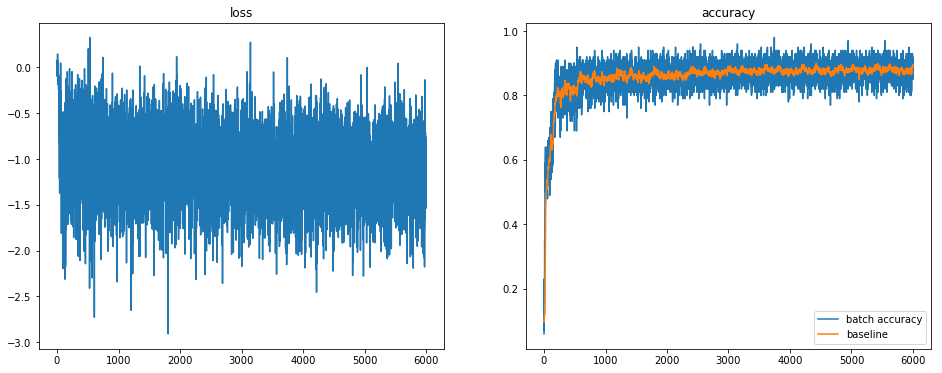

In [9]:
npstats = np.array(stats)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(npstats[:, 0])
plt.title('loss')

plt.subplot(1, 2, 2)
plt.plot(npstats[:, 1])
plt.plot(npstats[:, 2])
plt.legend(['batch accuracy', 'baseline'])
plt.title('accuracy')

In [10]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(np.mean(y_pred == y_test))

0.8814
